<a href="https://colab.research.google.com/github/jeffreyli2/High-School-Senior-College-Recommendation/blob/main/College_Recommendation_for_Senior_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and Importing Libraries

In [ ]:
# To manipulate data
import pandas as pd
import numpy as np

# To visualize data
import seaborn as sns
import matplotlib.pyplot as plt

# For data scaling and cluster identification
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Loading the Dataset

In [ ]:
# Read the CSV file
samplestudent = pd.read_csv('SampleStudent.csv')

In [ ]:
# Create a copy of the dataset
hssenior = samplestudent.copy()

# Data Overview

## Displaying the first rows of the dataset

In [ ]:
# Display the first five rows of the dataset
hssenior.head()

,College Name,Major,State,State Resident,2025-26 Tuition (In-State),2025-26 Tuition (Out-of-State),Other Expenses,School Rank,Major/Department Rank,Employment Growth Rate,Number of Jobs,4-Year Enrollment in 2023,4-Year Enrollment in 2024,4-Year Enrollment in 2025
0,Baylor University,Bioinformatics,Texas,Yes,"$63,620","$63,620","$16,638",88,6,5.46,66539,3026,3309,3101
1,UT San Antonio,Mechanical Engineering,Texas,Yes,"$11,448","$27,598","$19,672",213,136,8.32,293455,161872,174472,194276
2,UT Dallas,Finance,Texas,Yes,"$14,644","$40,164","$20,239",110,31,7.49,364877,164261,187619,208071
3,Texas A&M,Chemical Engineering,Texas,Yes,"$13,342.30","$41,137.60","$18,386.00",51,21,7.35,21393,31960,32448,34343
4,University of Florida,Electrical Engineering,Florida,No,"$6,380","$30,900","$17,800",30,43,7.31,193678,69875,75671,86083


## Understanding the shape of the dataset

In [ ]:
# Check the shape of the data
hssenior.shape

(10, 14)

## Checking the data types of the columns

In [ ]:
# Check the data types
hssenior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   College Name                    10 non-null     object 
 1   Major                           10 non-null     object 
 2   State                           10 non-null     object 
 3   State Resident                  10 non-null     object 
 4   2025-26 Tuition (In-State)      10 non-null     object 
 5   2025-26 Tuition (Out-of-State)  10 non-null     object 
 6   Other Expenses                  10 non-null     object 
 7   School Rank                     10 non-null     int64  
 8   Major/Department Rank           10 non-null     int64  
 9   Employment Growth Rate          10 non-null     float64
 10  Number of Jobs                  10 non-null     int64  
 11  4-Year Enrollment in 2023       10 non-null     int64  
 12  4-Year Enrollment in 2024       10 non-

In [ ]:
# Convert the in-state and out-state tuition, as well as the other expenses columns into float format
hssenior['2025-26 Tuition (In-State)'] = hssenior['2025-26 Tuition (In-State)'].str.replace('$', '').str.replace(',', '').astype(float)
hssenior['2025-26 Tuition (Out-of-State)'] = hssenior['2025-26 Tuition (Out-of-State)'].str.replace('$', '').str.replace(',', '').astype(float)
hssenior['Other Expenses'] = hssenior['Other Expenses'].str.replace('$', '').str.replace(',', '').astype(float)

## Checking the statistical summary

In [ ]:
# Check the statistical summary
hssenior.describe()

,2025-26 Tuition (In-State),2025-26 Tuition (Out-of-State),Other Expenses,School Rank,Major/Department Rank,Employment Growth Rate,Number of Jobs,4-Year Enrollment in 2023,4-Year Enrollment in 2024,4-Year Enrollment in 2025
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,1.000000e+01,10.000000,10.000000,10.000000
mean,24870.130000,44658.260000,18430.300000,79.400000,46.60000,6.812000,8.174823e+05,131301.400000,136783.400000,145145.100000
std,21971.914376,12687.784276,3902.777047,53.581091,40.28013,1.021565,1.463596e+06,147155.135576,150108.783449,155626.060416
min,6380.000000,27598.000000,10935.000000,30.000000,6.00000,5.460000,2.139300e+04,3026.000000,3309.000000,3101.000000
25%,13416.975000,40407.400000,16928.500000,47.250000,21.50000,5.737500,2.176850e+04,31960.000000,32448.000000,34343.000000
50%,16593.000000,41967.500000,18958.000000,59.000000,37.00000,7.330000,1.301085e+05,53632.500000,56321.000000,62098.000000
75%,20007.500000,46998.500000,19696.000000,94.750000,54.25000,7.350000,3.470215e+05,163663.750000,184332.250000,204622.250000
max,67990.000000,67990.000000,26147.000000,213.000000,136.00000,8.320000,3.584600e+06,390355.000000,396224.000000,409389.000000


## Checking for duplicate values

In [ ]:
# Check for duplicate values
int(hssenior.duplicated().sum())

0

## Checking for missing values

In [ ]:
# Check for missing values
hssenior.isnull().sum()

,0
College Name,0
Major,0
State,0
State Resident,0
2025-26 Tuition (In-State),0
2025-26 Tuition (Out-of-State),0
Other Expenses,0
School Rank,0
Major/Department Rank,0
Employment Growth Rate,0


# Exploratory Data Analysis

## Yearly Tuition by College (2025-26)

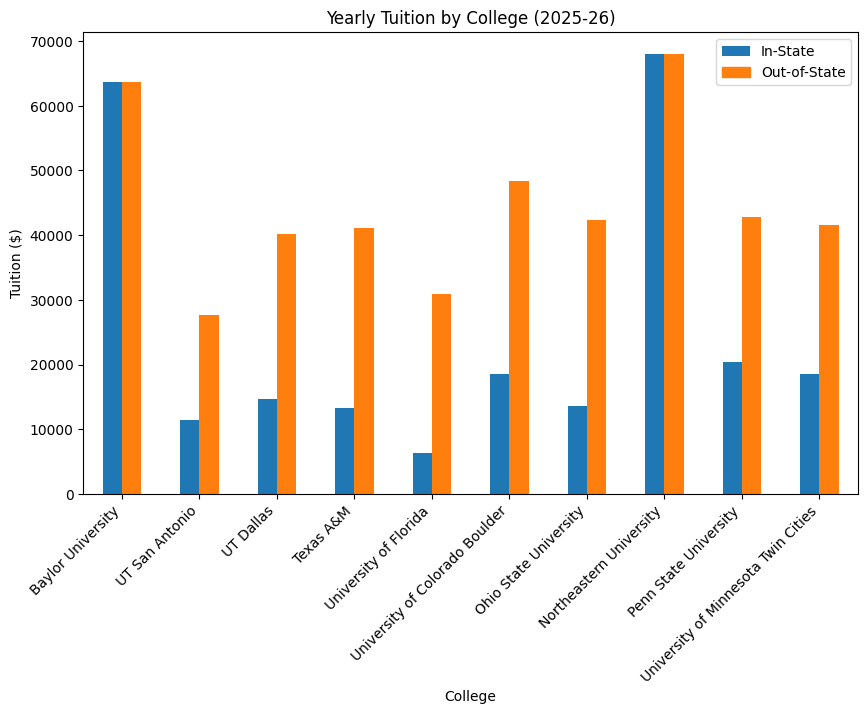

In [ ]:
# Create a bar chart with both in-state and out-of-state tuition for each college
hssenior.plot(x='College Name', y=['2025-26 Tuition (In-State)', '2025-26 Tuition (Out-of-State)'], kind='bar', figsize=(10, 6))

# Create custom legend handles
import matplotlib.patches as mpatches
in_state_patch = mpatches.Patch(label='In-State')
out_of_state_patch = mpatches.Patch(color='#ff7f0e', label='Out-of-State')
plt.legend(handles=[in_state_patch, out_of_state_patch])

# Add labels and title
plt.xlabel('College')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Tuition ($)')
plt.title('Yearly Tuition by College (2025-26)')

# Display the chart
plt.show()

## Total Yearly Expenses by College (2025-26)

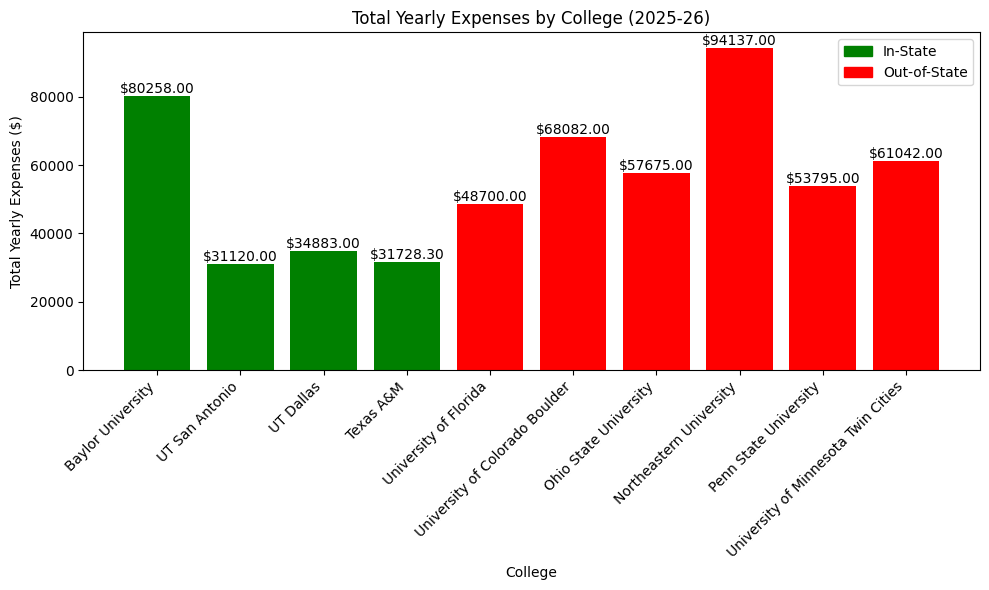

In [ ]:
# Create columns representing the total yearly expenses for 2025-26 (in-state and out-of-state)
hssenior['2025-26 Total Expenses (In-State)'] = hssenior['2025-26 Tuition (In-State)'] + hssenior['Other Expenses']
hssenior['2025-26 Total Expenses (Out-of-State)'] = hssenior['2025-26 Tuition (Out-of-State)'] + hssenior['Other Expenses']

# Create a new column 'Total Yearly Expenses' based on 'State Resident'
hssenior['Total Yearly Expenses'] = hssenior.apply(
    lambda row: row['2025-26 Total Expenses (In-State)'] if row['State Resident'] == 'Yes'
    else row['2025-26 Total Expenses (Out-of-State)'], axis=1
)

# Create a bar chart with the selected total yearly expenses for each college
plt.figure(figsize=(10, 6))

# Define colors based on state residency status
colors = ['green' if resident == 'Yes' else 'red' for resident in hssenior['State Resident']]

# Plot each bar individually with the assigned color
bars = plt.bar(hssenior['College Name'], hssenior['Total Yearly Expenses'], color=colors)

# Create custom legend handles
in_state_total_patch = mpatches.Patch(color='green', label='In-State')
out_of_state_total_patch = mpatches.Patch(color='red', label='Out-of-State')
plt.legend(handles=[in_state_total_patch, out_of_state_total_patch])

# Add value labels above the bars
plt.bar_label(bars, fmt='$%.2f')

# Add labels and title
plt.xlabel('College')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Yearly Expenses ($)')
plt.title('Total Yearly Expenses by College (2025-26)')

# Display the chart
plt.tight_layout()
plt.show()

## Rank by College and Major/Department

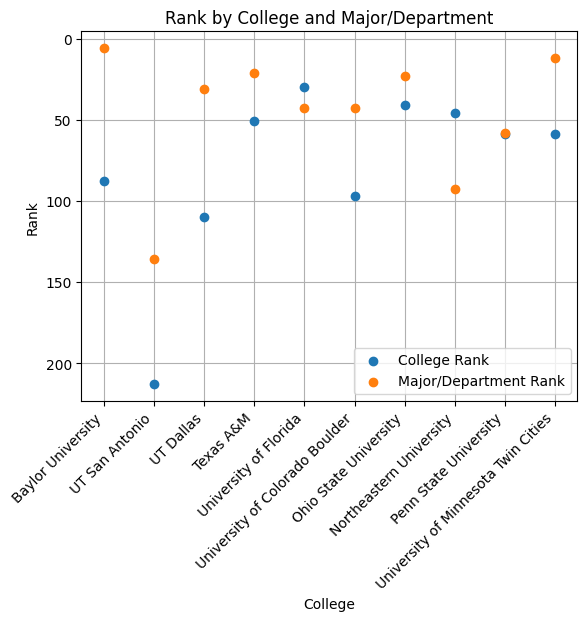

In [ ]:
# Extract columns for plotting
name = hssenior['College Name']
college = hssenior['School Rank']
major = hssenior['Major/Department Rank']

# Create a plot showing the college rank and major/department rank for each college
plt.scatter(name, college, label='College Rank', zorder=3)
plt.scatter(name, major, label='Major/Department Rank', zorder=3)
plt.gca().invert_yaxis() # Show the rank from highest to lowest
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('College')
plt.ylabel('Rank')
plt.title('Rank by College and Major/Department')

# Add the legend and grid lines and display the chart
plt.legend()
plt.grid(True)
plt.show()

## Job Growth Rate and Job Count by Major

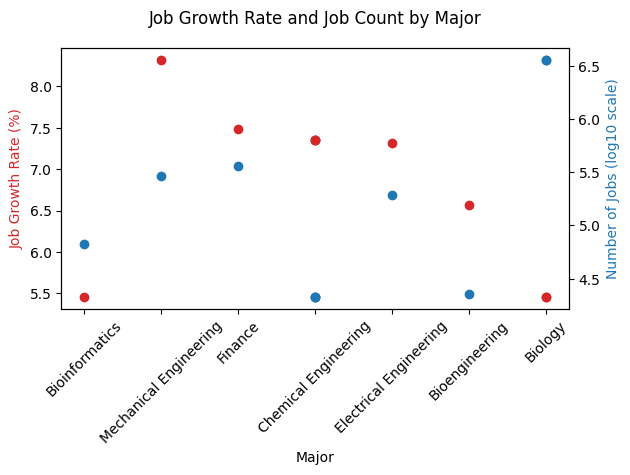

In [ ]:
# Extract columns for plotting
major = hssenior['Major']
jobgrowth = hssenior['Employment Growth Rate']
jobcount = np.log10(hssenior['Number of Jobs']) # Transform to log10 values for better display

# Create a plot showing the employment growth rate and number of jobs for each major
fig, ax1 = plt.subplots()

# Employment Growth Rate (left)
ax1.scatter(major, jobgrowth, color='tab:red')
ax1.set_xlabel('Major')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Job Growth Rate (%)', color='tab:red')
ax1.tick_params(axis='y')

# Number of Jobs (right)
ax2 = ax1.twinx()  # Create the twin axis
ax2.scatter(major, jobcount, color='tab:blue')
ax2.set_ylabel('Number of Jobs (log10 scale)', color='tab:blue')
ax2.tick_params(axis='y')

fig.suptitle('Job Growth Rate and Job Count by Major') # Add the title

# Display the plot
plt.tight_layout()
plt.show()

## 4-Year Enrollment Trend by Major

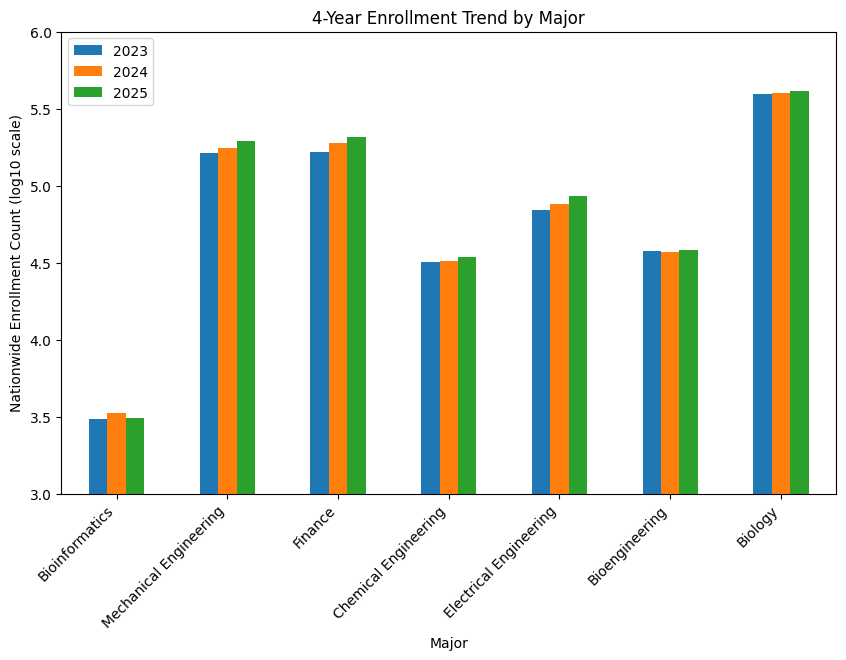

In [ ]:
# Extract the 'Major' and enrollment columns, keeping only the unique, corresponding values
major_unique = hssenior['Major'].unique()
enrollment_2023 = hssenior['4-Year Enrollment in 2023'].unique()
enrollment_2024 = hssenior['4-Year Enrollment in 2024'].unique()
enrollment_2025 = hssenior['4-Year Enrollment in 2025'].unique()

# Apply log10 transformation to the original enrollment columns for better display
logged_enrollment_2023 = np.log10(enrollment_2023)
logged_enrollment_2024 = np.log10(enrollment_2024)
logged_enrollment_2025 = np.log10(enrollment_2025)

# Create a new DataFrame for plotting that includes all unique majors and the logged enrollment data
plot_enrollment = pd.DataFrame({
    'Major': major_unique,
    '2023': logged_enrollment_2023,
    '2024': logged_enrollment_2024,
    '2025': logged_enrollment_2025
})

# Create the bar chart using the new DataFrame
ax = plot_enrollment.plot(x='Major', y=['2023', '2024', '2025'], kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Major')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Nationwide Enrollment Count (log10 scale)')
plt.title('4-Year Enrollment Trend by Major')

# Set the y-axis range
plt.ylim(3, 6)

# Display the chart
plt.show()

## Enrollment Growth Rate by Major

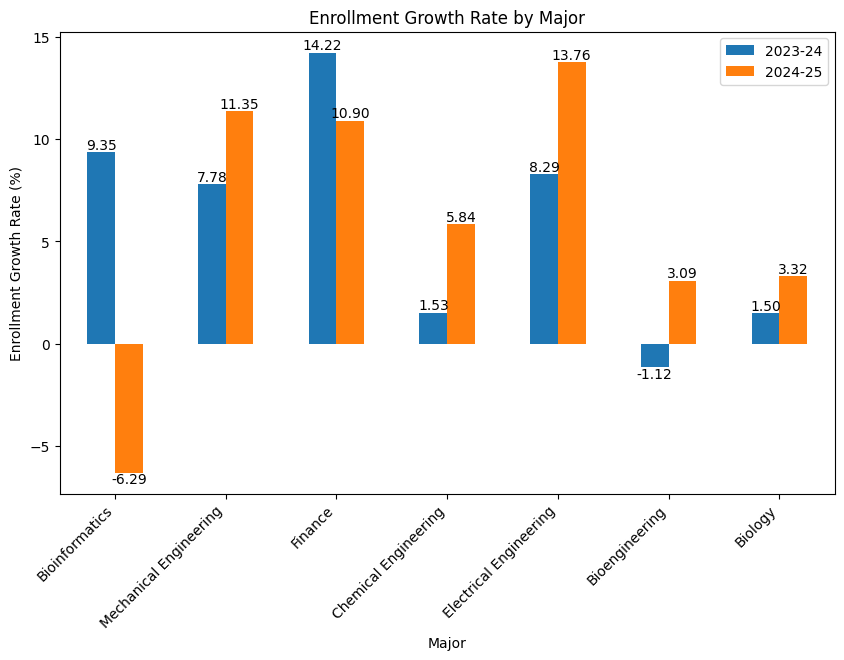

In [ ]:
# Create variables storing the growth rate of student enrollment for each major
hssenior['Enrollment Growth Rate (2023-24)'] = ((hssenior['4-Year Enrollment in 2024'] - hssenior['4-Year Enrollment in 2023'])) * 100 / hssenior['4-Year Enrollment in 2023']
hssenior['Enrollment Growth Rate (2024-25)'] = ((hssenior['4-Year Enrollment in 2025'] - hssenior['4-Year Enrollment in 2024'])) * 100 / hssenior['4-Year Enrollment in 2024']

# Extract the 'Major' and enrollment growth columns

# Keep only the unique values for the created variables
enrollment_growth_2023_24 = hssenior['Enrollment Growth Rate (2023-24)'].unique()
enrollment_growth_2024_25 = hssenior['Enrollment Growth Rate (2024-25)'].unique()

# Create a new DataFrame for plotting that includes all unique majors and the logged enrollment data
plot_enrollment = pd.DataFrame({
    'Major': major_unique,
    '2023-24': enrollment_growth_2023_24,
    '2024-25': enrollment_growth_2024_25
})

# Create the bar chart using the new DataFrame
ax = plot_enrollment.plot(x='Major', y=['2023-24', '2024-25'], kind='bar', figsize=(10, 6))

# Add value labels above the bars
plt.bar_label(ax.containers[0], fmt='%.2f')
plt.bar_label(ax.containers[1], fmt='%.2f')

# Add labels and title
plt.xlabel('Major')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Enrollment Growth Rate (%)')
plt.title('Enrollment Growth Rate by Major')

# Display the chart
plt.show()

## Total Costs vs School and Major/Department Ranks with Trend Lines

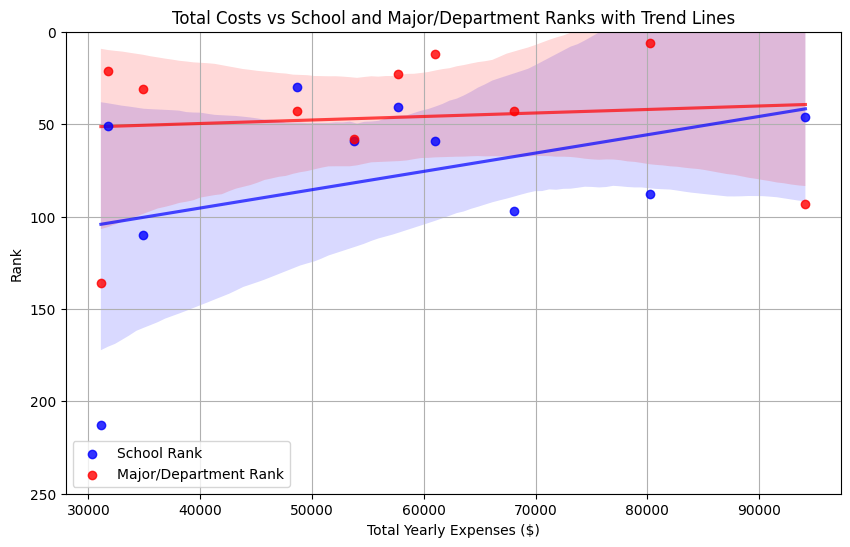

In [ ]:
# Create a plot displaying each college's tuition vs school and major/department ranks
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Yearly Expenses', y='School Rank', data=hssenior, ax=plt.gca(), scatter=True, label='School Rank', color='blue', line_kws={'alpha':0.7}, scatter_kws={'zorder':3})
sns.regplot(x='Total Yearly Expenses', y='Major/Department Rank', data=hssenior, ax=plt.gca(), scatter=True, label='Major/Department Rank', color='red', line_kws={'alpha':0.7}, scatter_kws={'zorder':3})
plt.gca().invert_yaxis() # Rank 1 at the top

# Add labels, legend, title, and grid lines
plt.xlabel('Total Yearly Expenses ($)')
plt.ylabel('Rank')
plt.title('Total Costs vs School and Major/Department Ranks with Trend Lines')
plt.legend()
plt.grid(True)

# Set the y-axis range
plt.ylim(250, 0)

# Display the plot
plt.show()

## Total Cost vs Major Job Growth by College

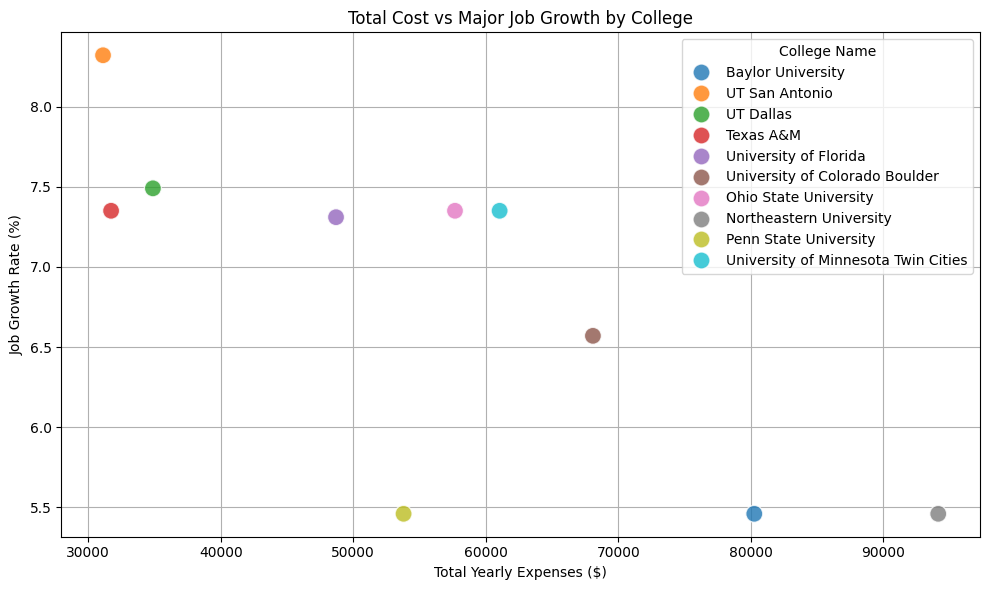

In [ ]:
# Increased figure size for better label separation
plt.figure(figsize=(10, 6))

# Create a plot showing each college's total cost by job growth rate
sns.scatterplot(
    data=hssenior,
    x='Total Yearly Expenses',
    y='Employment Growth Rate',
    hue='College Name',
    alpha=0.8,
    s=150, # Larger point size for better visibility
    ax=plt.gca(),
    zorder=3
)

# Add labels, title, and grid lines and display plot
plt.xlabel('Total Yearly Expenses ($)')
plt.ylabel('Job Growth Rate (%)')
plt.title('Total Cost vs Major Job Growth by College')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/title from being cut off
plt.show()

# Clustering

In [ ]:
# Choose numeric features for clustering
features = [
    'Total Yearly Expenses',
    'School Rank',
    'Major/Department Rank',
    'Employment Growth Rate',
    'Enrollment Growth Rate (2023-24)',
    'Enrollment Growth Rate (2024-25)'
]

# Make a subset of the data
X = hssenior[features].copy()

In [ ]:
# Scale the subset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

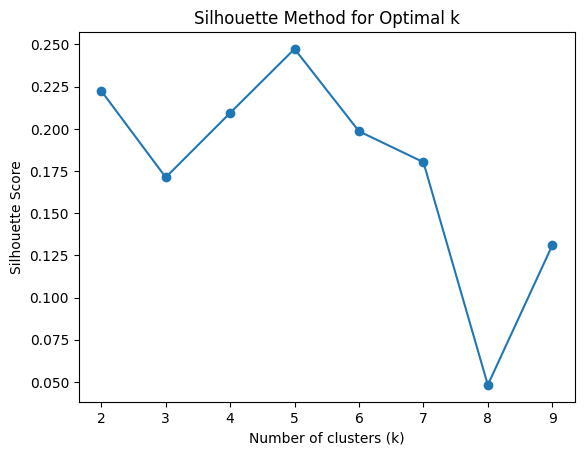

In [ ]:
# Create a list that will store silhouette scores
sil_scores = []
K = range(2, 10) # silhouette requires at least 2 clusters

# Store the silhouette score for each number of clusters
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X_scaled)
  score = silhouette_score(X_scaled, labels)
  sil_scores.append(score)

# Plot the silhouette scores with labels and display it
plt.plot(K, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()

In [ ]:
# Choose 5 clusters since the silhouette score is the highest
kmeans = KMeans(n_clusters=5, random_state=42)
hssenior['cluster'] = kmeans.fit_predict(X_scaled)

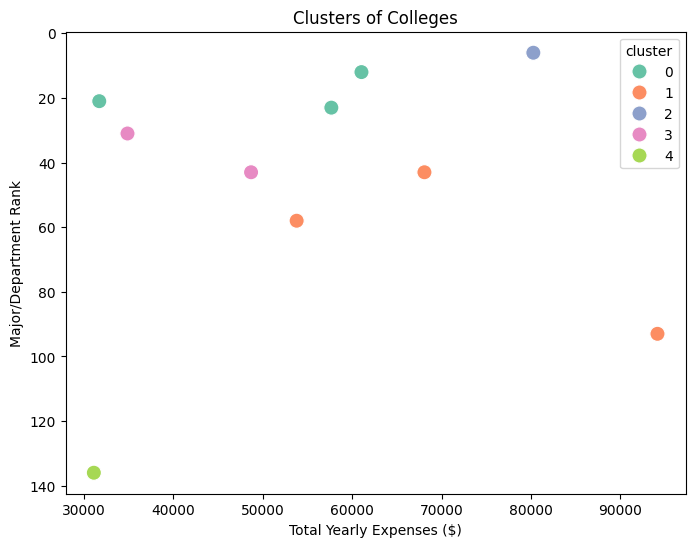

In [ ]:
# Create a plot showing the clusters of colleges for total yearly expenses and major/department rank
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=hssenior,
    x='Total Yearly Expenses',
    y='Major/Department Rank',
    hue='cluster',
    palette='Set2',
    s=120
)
plt.gca().invert_yaxis() # Show the rank from highest to lowest
plt.xlabel('Total Yearly Expenses ($)') # Add $ to the x-label
plt.title('Clusters of Colleges') # Add title
plt.show()

In [ ]:
# Display the mean values for each cluster's numeric features
hssenior.groupby('cluster')[features].mean()

,Total Yearly Expenses,School Rank,Major/Department Rank,Employment Growth Rate,Enrollment Growth Rate (2023-24),Enrollment Growth Rate (2024-25)
cluster,,,,,,
0,50148.433333,50.333333,18.666667,7.35,1.526909,5.840113
1,72004.666667,67.333333,64.666667,5.83,0.628795,3.244713
2,80258.000000,88.000000,6.000000,5.46,9.352280,-6.285887
3,41791.500000,70.000000,37.000000,7.40,11.257432,12.330190
4,31120.000000,213.000000,136.000000,8.32,7.783928,11.350818
